In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./gapminder.tsv', sep='\t')

In [3]:
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [5]:
avg_live_exp_by_year = df.groupby('year').lifeExp.mean()
avg_live_exp_by_year

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [6]:
years = df.year.unique()
years

array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
       2007])

In [8]:
y1952 = df.loc[df.year == 1952,:]

In [9]:
y1952.lifeExp.mean()

49.057619718309866

In [10]:
df.groupby('continent').lifeExp.describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
Africa,624.0,48.865330,9.150210,23.599,42.37250,47.7920,54.41150,76.442
Americas,300.0,64.658737,9.345088,37.579,58.41000,67.0480,71.69950,80.653
Asia,396.0,60.064903,11.864532,28.801,51.42625,61.7915,69.50525,82.603
Europe,360.0,71.903686,5.433178,43.585,69.57000,72.2410,75.45050,81.757
Oceania,24.0,74.326208,3.795611,69.120,71.20500,73.6650,77.55250,81.235


In [12]:
import numpy as np
cont_le_agg = df.groupby('continent').lifeExp.agg(np.mean)
cont_le_agg

continent
Africa      48.865330
Americas    64.658737
Asia        60.064903
Europe      71.903686
Oceania     74.326208
Name: lifeExp, dtype: float64

In [13]:
def my_mean(values):
    n = len(values)
    return np.sum(values)/n

In [14]:
agg_my_mean = df.groupby('year').lifeExp.agg(my_mean)
agg_my_mean

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [23]:
def my_mean_diff(values,diff_value):
    n = len(values)
    return np.sum(values)/n -diff_value

In [24]:
global_mean = df.lifeExp.mean()

In [25]:
agg_my_mean_diff = df.groupby('year').lifeExp.agg(my_mean_diff,diff_value=global_mean)
agg_my_mean_diff

year
1952   -10.416820
1957    -7.967038
1962    -5.865190
1967    -3.796150
1972    -1.827053
1977     0.095718
1982     2.058758
1987     3.738173
1992     4.685899
1997     5.540237
2002     6.220483
2007     7.532983
Name: lifeExp, dtype: float64

In [26]:
gdf = df.groupby('year').lifeExp.agg([np.count_nonzero, np.mean, np.std])
gdf

,count_nonzero,mean,std
year,,,
1952,142.0,49.057620,12.225956
1957,142.0,51.507401,12.231286
1962,142.0,53.609249,12.097245
1967,142.0,55.678290,11.718858
1972,142.0,57.647386,11.381953
1977,142.0,59.570157,11.227229
1982,142.0,61.533197,10.770618
1987,142.0,63.212613,10.556285
1992,142.0,64.160338,11.227380


In [31]:
gdf = df.groupby('year').lifeExp.agg([np.count_nonzero, np.mean, np.std]).\
rename(columns={'count_nonzero':'count','mean':'avg', 'std':'std_dev'})
gdf

,count,avg,std_dev
year,,,
1952,142.0,49.057620,12.225956
1957,142.0,51.507401,12.231286
1962,142.0,53.609249,12.097245
1967,142.0,55.678290,11.718858
1972,142.0,57.647386,11.381953
1977,142.0,59.570157,11.227229
1982,142.0,61.533197,10.770618
1987,142.0,63.212613,10.556285
1992,142.0,64.160338,11.227380


In [35]:
def my_zscore(x):
    print('Len',len(x))
    return (x - x.mean())/x.std()

In [36]:
len(df)

1704

In [38]:
df.groupby('year').describe()

gdpPercap                                                       \
         count          mean           std         min          25%   
year                                                                  
1952     142.0   3725.276046   9321.064786  298.846212   864.752389   
1957     142.0   4299.408345   9869.662202  335.997115   930.540819   
1962     142.0   4725.812342   8667.362525  355.203227  1059.149171   
1967     142.0   5483.653047   8095.315431  349.000000  1151.245103   
1972     142.0   6770.082815  10614.383403  357.000000  1257.193853   
1977     142.0   7313.166421   8362.489150  371.000000  1357.257252   
1982     142.0   7518.901673   7733.845006  424.000000  1363.338985   
1987     142.0   7900.920218   8288.281304  385.000000  1327.469823   
1992     142.0   8158.608521   9031.846080  347.000000  1270.660958   
1997     142.0   9090.175363  10171.493263  312.188423  1366.837958   
2002     142.0   9917.848365  11154.114865  241.165877  1409.567264   
2007     142.0  11680.071820  12859.937337  277.551859  1624.842248   

                                              lifeExp             \
              50%           75%           max   count       mean   
year                                                               
1952  1968.528344   3913.492777  108382.35290   142.0  49.057620   
1957  2173.220291   4876.356362  113523.13290   142.0  51.507401   
1962  2335.439533   5709.381428   95458.11176   142.0  53.609249   
1967  2678.334741   7075.932943   80894.88326   142.0  55.678290   
1972  3339.129407   9508.839303  109347.86700   142.0  57.647386   
1977  3798.609244  11204.102423   59265.47714   142.0  59.570157   
1982  4216.228428  12347.953723   33693.17525   142.0  61.533197   
1987  4280.300366  11994.052795   31540.97480   142.0  63.212613   
1992  4386.085502  10684.351870   34932.91959   142.0  64.160338   
1997  4781.825478  12022.867188   41283.16433   142.0  65.014676   
2002  5319.804524  13359.512257   44683.97525   142.0  65.694923   
2007  6124.371109  18008.835640   49357.19017   142.0  67.007423   

          ...                           pop                              \
          ...            75%     max  count          mean           std   
year      ...                                                             
1952      ...       59.76500  72.670  142.0  1.695040e+07  5.810086e+07   
1957      ...       63.03675  73.470  142.0  1.876341e+07  6.550429e+07   
1962      ...       65.23450  73.680  142.0  2.042101e+07  6.978865e+07   
1967      ...       67.41950  74.160  142.0  2.265830e+07  7.837548e+07   
1972      ...       69.24750  74.720  142.0  2.518998e+07  8.864682e+07   
1977      ...       70.38250  76.110  142.0  2.767638e+07  9.748109e+07   
1982      ...       70.92125  77.110  142.0  3.020730e+07  1.050986e+08   
1987      ...       71.87725  78.670  142.0  3.303857e+07  1.147562e+08   
1992      ...       72.58250  79.360  142.0  3.599092e+07  1.245026e+08   
1997      ...       74.16975  80.690  142.0  3.883947e+07  1.334174e+08   
2002      ...       75.45925  82.000  142.0  4.145759e+07  1.408483e+08   
2007      ...       76.41325  82.603  142.0  4.402122e+07  1.476214e+08   

                                                                   
           min         25%         50%          75%           max  
year                                                               
1952   60011.0  1452026.25   3943953.0   9168197.75  5.562635e+08  
1957   61325.0  1568811.25   4282942.0   9817598.00  6.374080e+08  
1962   65345.0  1784362.00   4686039.5  10980084.50  6.657700e+08  
1967   70787.0  2034768.50   5170175.5  12614584.75  7.545500e+08  
1972   76595.0  2351191.50   5877996.5  14679199.50  8.620300e+08  
1977   86796.0  2759717.25   6404036.5  16670227.00  9.434550e+08  
1982   98593.0  3006286.25   7007320.0  18407324.75  1.000281e+09  
1987  110812.0  3194989.50   7774861.5  20947542.50  1.084035e+09  
1992  125911.0  3605992.00   8688686.5  2270

In [37]:
transform_z = df.groupby('year').lifeExp.transform(my_zscore)
transform_z

Len 142
Len 142
Len 142
Len 142
Len 142
Len 142
Len 142
Len 142
Len 142
Len 142
Len 142
Len 142


0      -1.656854
1      -1.731249
2      -1.786543
3      -1.848157
4      -1.894173
5      -1.882224
6      -2.012809
7      -2.121069
8      -2.002813
9      -2.011488
10     -1.919077
11     -1.919936
12      0.504859
13      0.635469
14      0.926719
15      0.899551
16      0.882328
17      0.833673
18      0.825097
19      0.832432
20      0.660943
21      0.686480
22      0.810767
23      0.779886
24     -0.489174
25     -0.476025
26     -0.438633
27     -0.364480
28     -0.274943
29     -0.138606
          ...   
1674   -1.153155
1675   -0.974833
1676   -0.762541
1677   -0.605105
1678   -0.438681
1679   -0.356947
1680   -0.574157
1681   -0.607491
1682   -0.627106
1683   -0.675005
1684   -0.662486
1685   -0.728956
1686   -0.901731
1687   -1.173861
1688   -1.608598
1689   -2.143415
1690   -2.158168
1691   -2.039541
1692   -0.049617
1693   -0.084897
1694   -0.103433
1695   -0.143639
1696   -0.176805
1697   -0.168889
1698   -0.108647
1699   -0.081621
1700   -0.336974
1701   -1.5749

In [39]:
df.shape, transform_z.shape

((1704, 6), (1704,))

In [40]:
from scipy.stats import zscore

In [41]:
zscore(df.lifeExp)

array([-2.37533395, -2.25677417, -2.1278375 , ..., -0.98080452,
       -1.5089415 , -1.23805834])

In [42]:
transform_z.head()

0   -1.656854
1   -1.731249
2   -1.786543
3   -1.848157
4   -1.894173
Name: lifeExp, dtype: float64

In [56]:
import seaborn as sns
import numpy as np

In [57]:
np.random.seed(42)

In [58]:
tips_10  = sns.load_dataset('tips').sample(10)

In [59]:
tips_10.index

Int64Index([24, 6, 153, 211, 198, 176, 192, 124, 9, 101], dtype='int64')

In [60]:
tips_10.loc[np.random.permutation(tips_10.index)[:4],'total_bill'] = np.NAN

In [61]:
tips_10

,total_bill,tip,sex,smoker,day,time,size
24,19.82,3.18,Male,No,Sat,Dinner,2
6,8.77,2.00,Male,No,Sun,Dinner,2
153,NaN,2.00,Male,No,Sun,Dinner,4
211,NaN,5.16,Male,Yes,Sat,Dinner,4
198,NaN,2.00,Female,Yes,Thur,Lunch,2
176,NaN,2.00,Male,Yes,Sun,Dinner,2
192,28.44,2.56,Male,Yes,Thur,Lunch,2
124,12.48,2.52,Female,No,Thur,Lunch,2
9,14.78,3.23,Male,No,Sun,Dinner,2
101,15.38,3.00,Female,Yes,Fri,Dinner,2


In [62]:
def fill_na_mean(x):
    avg = x.mean()
    return x.fillna(avg)

In [63]:
total_bill_group_mean = tips_10.groupby('sex').total_bill.transform(fill_na_mean)
total_bill_group_mean

24     19.8200
6       8.7700
153    17.9525
211    17.9525
198    13.9300
176    17.9525
192    28.4400
124    12.4800
9      14.7800
101    15.3800
Name: total_bill, dtype: float64

In [64]:
tips_10['fill_total_bill'] = total_bill_group_mean
tips_10.head()

,total_bill,tip,sex,smoker,day,time,size,fill_total_bill
24,19.82,3.18,Male,No,Sat,Dinner,2,19.8200
6,8.77,2.00,Male,No,Sun,Dinner,2,8.7700
153,NaN,2.00,Male,No,Sun,Dinner,4,17.9525
211,NaN,5.16,Male,Yes,Sat,Dinner,4,17.9525
198,NaN,2.00,Female,Yes,Thur,Lunch,2,13.9300


In [66]:
tips = sns.load_dataset('tips')
tips.shape

(244, 7)

In [67]:
tips['size'].value_counts()

2    156
3     38
4     37
5      5
6      4
1      4
Name: size, dtype: int64

In [68]:
tips_filtered = tips.groupby('size').filter(lambda x: x['size'].count() > 30)
tips_filtered

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [69]:
tips_filtered.shape

(231, 7)

In [71]:
tips_filtered['size'].value_counts()

2    156
3     38
4     37
Name: size, dtype: int64

In [72]:
type(tips_filtered)

pandas.core.frame.DataFrame

In [75]:
tips_10 = sns.load_dataset('tips').sample(10, random_state=42)
tips_10

,total_bill,tip,sex,smoker,day,time,size
24,19.82,3.18,Male,No,Sat,Dinner,2
6,8.77,2.00,Male,No,Sun,Dinner,2
153,24.55,2.00,Male,No,Sun,Dinner,4
211,25.89,5.16,Male,Yes,Sat,Dinner,4
198,13.00,2.00,Female,Yes,Thur,Lunch,2
176,17.89,2.00,Male,Yes,Sun,Dinner,2
192,28.44,2.56,Male,Yes,Thur,Lunch,2
124,12.48,2.52,Female,No,Thur,Lunch,2
9,14.78,3.23,Male,No,Sun,Dinner,2
101,15.38,3.00,Female,Yes,Fri,Dinner,2


In [76]:
grouped = tips_10.groupby('sex')
grouped

In [77]:
grouped.groups

{'Female': Int64Index([198, 124, 101], dtype='int64'),
 'Male': Int64Index([24, 6, 153, 211, 176, 192, 9], dtype='int64')}

In [78]:
grouped.mean()

,total_bill,tip,size
sex,,,
Male,20.02,2.875714,2.571429
Female,13.62,2.506667,2.000000


In [79]:
female = grouped.get_group('Female')
female

,total_bill,tip,sex,smoker,day,time,size
198,13.00,2.00,Female,Yes,Thur,Lunch,2
124,12.48,2.52,Female,No,Thur,Lunch,2
101,15.38,3.00,Female,Yes,Fri,Dinner,2


In [81]:
for sex_group in grouped:
    print(sex_group)

('Male',      total_bill   tip   sex smoker   day    time  size
24        19.82  3.18  Male     No   Sat  Dinner     2
6          8.77  2.00  Male     No   Sun  Dinner     2
153       24.55  2.00  Male     No   Sun  Dinner     4
211       25.89  5.16  Male    Yes   Sat  Dinner     4
176       17.89  2.00  Male    Yes   Sun  Dinner     2
192       28.44  2.56  Male    Yes  Thur   Lunch     2
9         14.78  3.23  Male     No   Sun  Dinner     2)
('Female',      total_bill   tip     sex smoker   day    time  size
198       13.00  2.00  Female    Yes  Thur   Lunch     2
124       12.48  2.52  Female     No  Thur   Lunch     2
101       15.38  3.00  Female    Yes   Fri  Dinner     2)


In [82]:
bill_sex_time = tips_10.groupby(['sex','time'])
bill_sex_time

In [84]:
group_avg =bill_sex_time.mean()
group_avg

total_bill       tip      size
sex    time                                  
Male   Lunch    28.440000  2.560000  2.000000
       Dinner   18.616667  2.928333  2.666667
Female Lunch    12.740000  2.260000  2.000000
       Dinner   15.380000  3.000000  2.000000

In [85]:
group_avg.columns, group_avg.index

(Index(['total_bill', 'tip', 'size'], dtype='object'),
 MultiIndex(levels=[['Male', 'Female'], ['Lunch', 'Dinner']],
            labels=[[0, 0, 1, 1], [0, 1, 0, 1]],
            names=['sex', 'time']))

In [86]:
group_avg.reset_index()

,sex,time,total_bill,tip,size
0,Male,Lunch,28.440000,2.560000,2.000000
1,Male,Dinner,18.616667,2.928333,2.666667
2,Female,Lunch,12.740000,2.260000,2.000000
3,Female,Dinner,15.380000,3.000000,2.000000


In [88]:
group_param = tips_10.groupby(['sex','time'],as_index=False).mean()
group_param

,sex,time,total_bill,tip,size
0,Male,Lunch,28.440000,2.560000,2.000000
1,Male,Dinner,18.616667,2.928333,2.666667
2,Female,Lunch,12.740000,2.260000,2.000000
3,Female,Dinner,15.380000,3.000000,2.000000


In [92]:
intv_df = pd.read_csv('./epi_sim.txt')
intv_df.head()

,ig_type,intervened,pid,rep,sid,tr
0,3,40,294524448,1,201,0.000135
1,3,40,294571037,1,201,0.000135
2,3,40,290699504,1,201,0.000135
3,3,40,288354895,1,201,0.000135
4,3,40,292271290,1,201,0.000135


In [93]:
count_only = intv_df.groupby(['rep', 'intervened','tr'])['ig_type'].count()
count_only.head()

rep  intervened  tr      
0    8           0.000166    1
     9           0.000152    3
                 0.000166    1
     10          0.000152    1
                 0.000166    1
Name: ig_type, dtype: int64

In [94]:
type(count_only)

pandas.core.series.Series

In [100]:
count_mean= count_only.groupby(level=[0,1,2]).mean()

In [99]:
count_only.groupby(level=['rep', 'intervened']).mean()

rep  intervened
0    8               1.000000
     9               2.000000
     10              1.000000
     12              4.000000
     13              2.000000
     14              4.500000
     15              5.500000
     16              9.500000
     17              8.000000
     18             16.000000
     19             11.500000
     20             19.000000
     21             17.000000
     22             27.500000
     23             27.000000
     24             41.500000
     25             51.500000
     26             64.500000
     27             76.500000
     28             89.500000
     29            100.500000
     30            134.500000
     31            166.000000
     32            222.500000
     33            248.000000
     34            300.000000
     35            401.500000
     36            478.000000
     37            548.000000
     38            702.500000
                      ...    
2    159             1.000000
     160             1.0

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

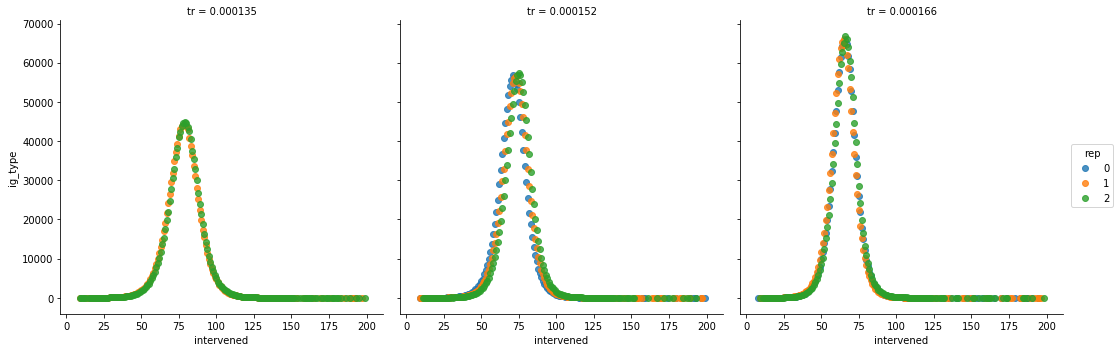

In [101]:
fig = sns.lmplot(x='intervened', y='ig_type', hue='rep', col='tr', fit_reg=False, data= count_mean.reset_index())

In [102]:
cumulative_count = intv_df.groupby(['rep', 'intervened','tr'])['ig_type'].count().\
groupby(level=['rep']).cumsum().reset_index()

In [103]:
cumulative_count.head()

,rep,intervened,tr,ig_type
0,0,8,0.000166,1
1,0,9,0.000152,4
2,0,9,0.000166,5
3,0,10,0.000152,6
4,0,10,0.000166,7


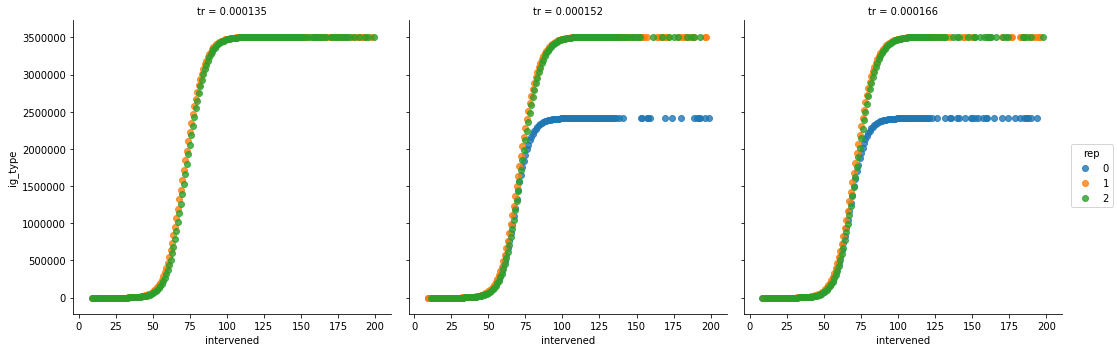

In [104]:
 fig = sns.lmplot(x='intervened', y='ig_type', hue='rep', col='tr', fit_reg=False, data= cumulative_count)